   Unnamed: 0    Artist                                        Url_spotify  \
0         0.0  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1         1.0  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2         2.0  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3         3.0  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4         4.0  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   

                                           Track  \
0                                 Feel Good Inc.   
1                                Rhinestone Eyes   
2  New Gold (feat. Tame Impala and Bootie Brown)   
3                             On Melancholy Hill   
4                                 Clint Eastwood   

                                           Album Album_type  \
0                                     Demon Days      album   
1                                  Plastic Beach      album   
2  New Gold (feat. Tame Impal

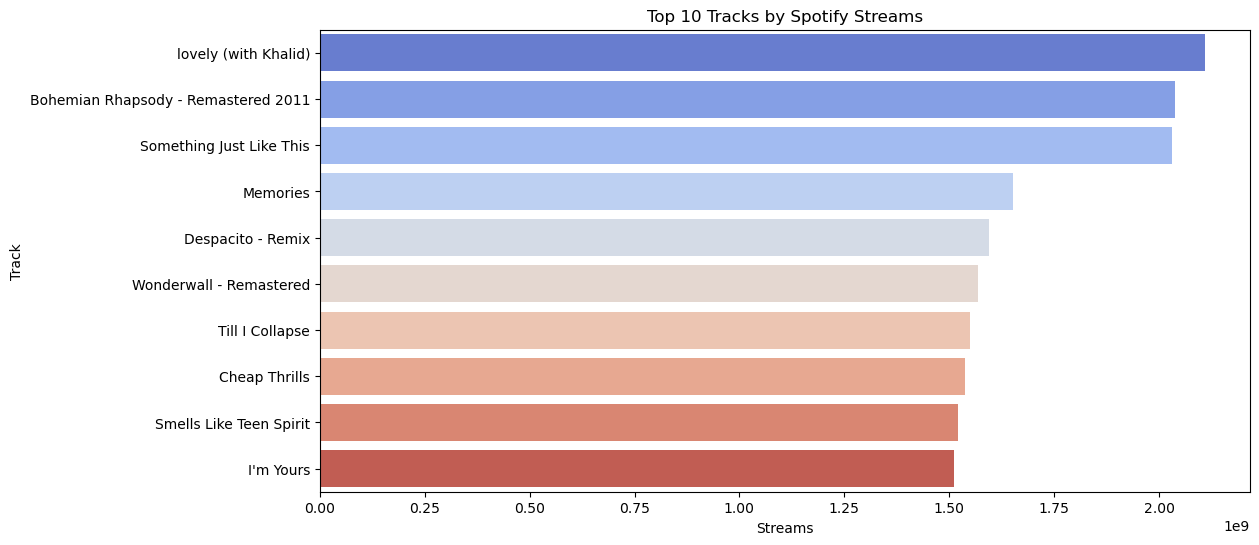

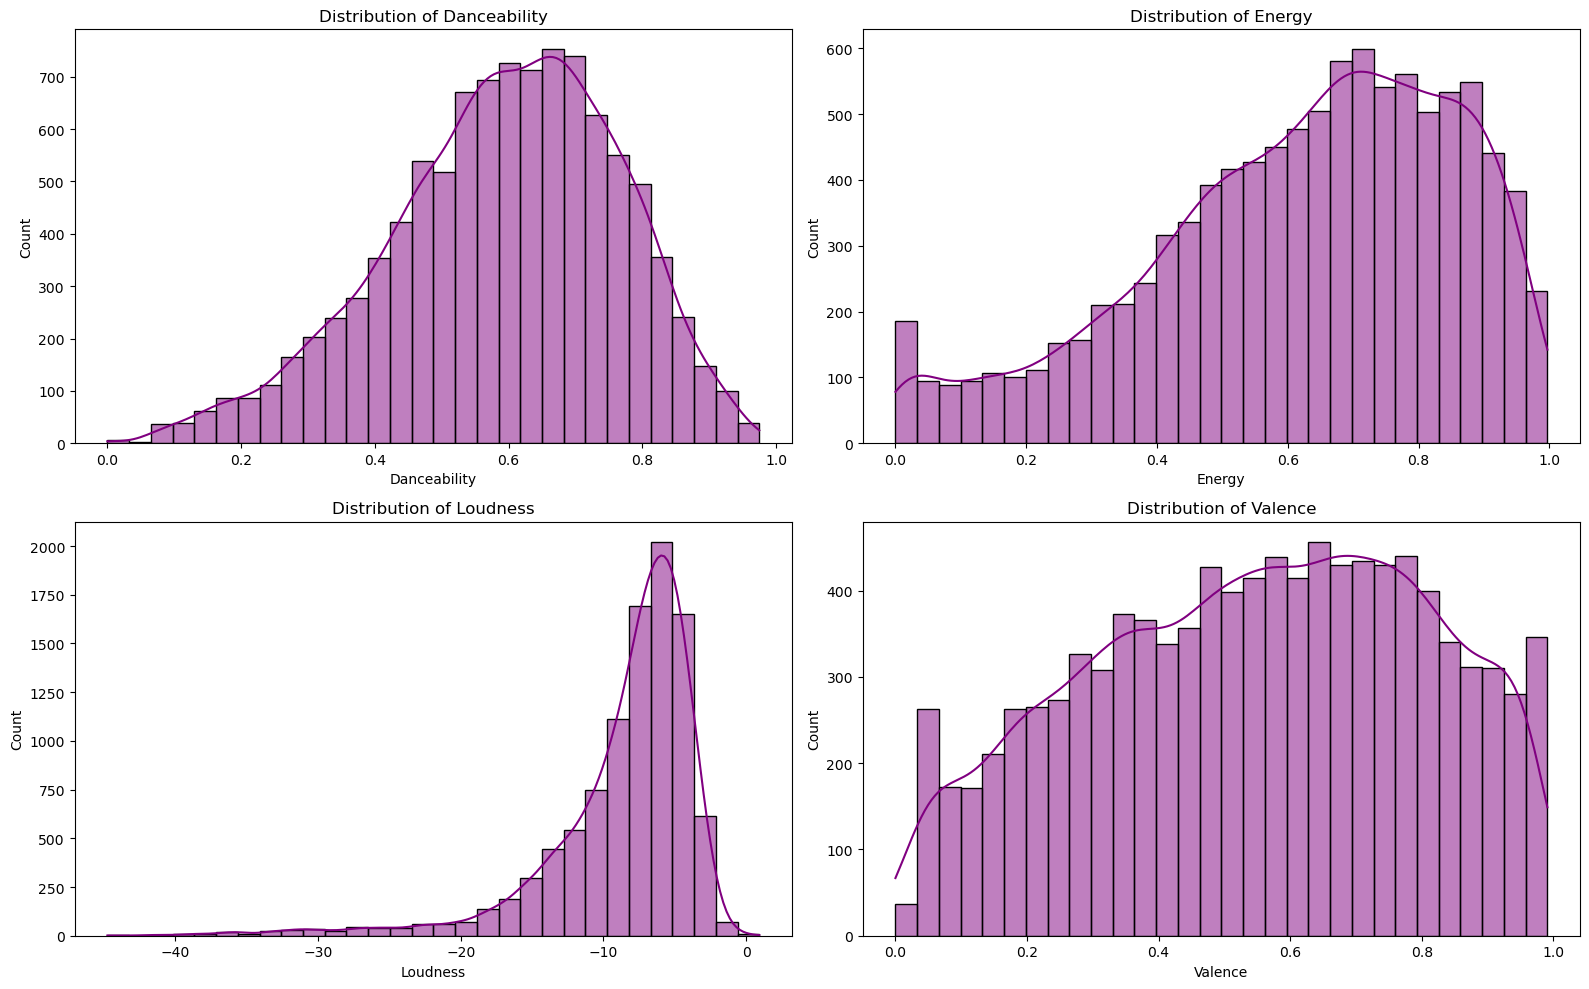

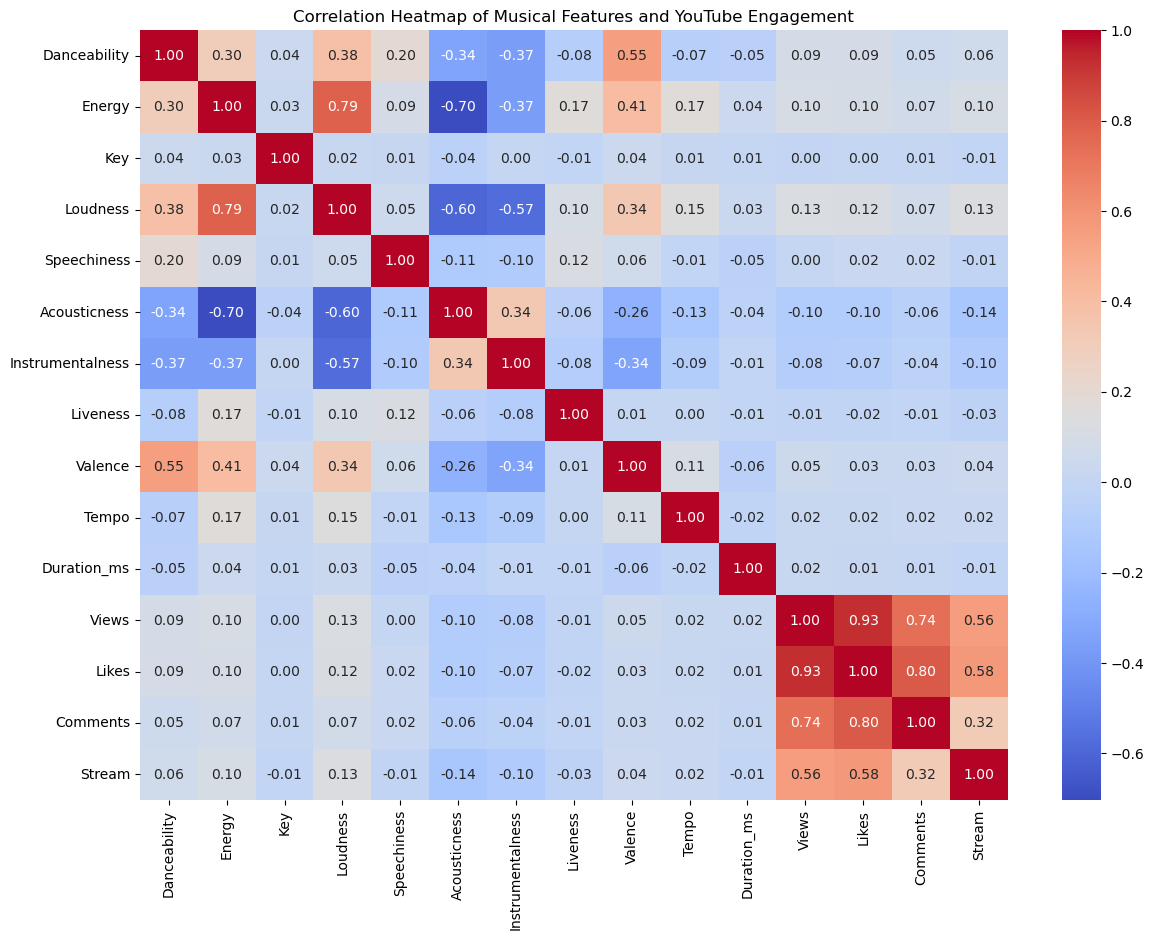

Artist
Coldplay                 1.177848e+09
Khalid                   1.138684e+09
Maroon 5                 1.072251e+09
Queen                    1.042726e+09
Eminem                   9.748588e+08
Sia                      7.368344e+08
Red Hot Chili Peppers    6.796467e+08
Kanye West               6.517926e+08
Linkin Park              6.362409e+08
AC/DC                    5.941406e+08
Name: Stream, dtype: float64


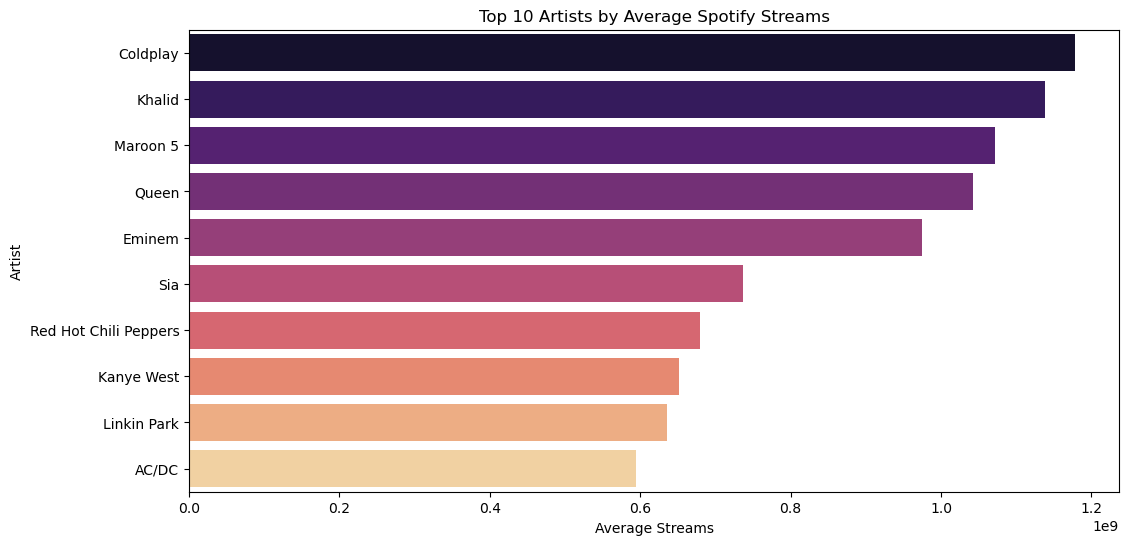

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Spotify dataset with specified columns (adjust the file path as needed)
spotify_data = pd.read_csv('Spotify_Youtube1.csv')

# Display first few rows to verify data loading
print(spotify_data.head())

# Basic information about the dataset
print(spotify_data.info())

# Check for missing values in all columns
print(spotify_data.isnull().sum())

# Fill missing values for important columns if necessary
spotify_data['Artist'].fillna('Unknown Artist', inplace=True)
spotify_data['Track'].fillna('Unknown Track', inplace=True)
spotify_data['Album'].fillna('Unknown Album', inplace=True)

# Remove duplicates if any
spotify_data.drop_duplicates(inplace=True)

# Top 10 tracks by popularity (assuming 'Stream' or 'Views' can represent popularity)
top_tracks_by_stream = spotify_data.sort_values(by='Stream', ascending=False).head(10)
print(top_tracks_by_stream[['Artist', 'Track', 'Stream', 'Views']])

# Visualization: Top 10 tracks by Streams
plt.figure(figsize=(12,6))
sns.barplot(y='Track', x='Stream', data=top_tracks_by_stream, palette='coolwarm')
plt.title('Top 10 Tracks by Spotify Streams')
plt.xlabel('Streams')
plt.ylabel('Track')
plt.show()

# Analyze distribution of musical features: Danceability, Energy, Loudness, Valence
features = ['Danceability', 'Energy', 'Loudness', 'Valence']
plt.figure(figsize=(16,10))
for i, feature in enumerate(features, 1):
    plt.subplot(2,2,i)
    sns.histplot(spotify_data[feature], bins=30, kde=True, color='purple')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Correlation heatmap of numerical features including musical features and YouTube engagement
numerical_cols = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
                  'Acousticness', 'Instrumentalness', 'Liveness', 'Valence',
                  'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments', 'Stream']

plt.figure(figsize=(14,10))
corr = spotify_data[numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Musical Features and YouTube Engagement')
plt.show()

# Top 10 artists by average streams
top_artists_streams = spotify_data.groupby('Artist')['Stream'].mean().sort_values(ascending=False).head(10)
print(top_artists_streams)

plt.figure(figsize=(12,6))
sns.barplot(x=top_artists_streams.values, y=top_artists_streams.index, palette='magma')
plt.title('Top 10 Artists by Average Spotify Streams')
plt.xlabel('Average Streams')
plt.ylabel('Artist')
plt.show()
